# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech
- **Nama:** Rizki Wahyu Nurcahyani Fajawrati
- **Email:** a123xbf441@devacademy.id
- **ID Dicoding:** a123xbf441

## Persiapan

### Import Semua Packages/Library yang Digunakan

Dalam mengerjakan proyek ini, langkah awalnyaadalah mengimpor semua library yang diperlukan. Library-library ini digunakan untuk berbagai keperluan seperti:
- manipulasi data (pandas, numpy),
- visualisasi data (matplotlib, seaborn),
- preprocessing menggunakan standardscaler dan label encoder
- modeling menggunakan random forest classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Data Understanding

#### Informasi Dataset
Dataset Employee merupakan dataset yang berasal dari institusi pendidikan perguruan yang telah berdiri sejak tahun 2000 bernama Jaya Jaya Institut, dan dapat diakses dengan  link berikut : https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv. Dataset ini kemudian saya download dan saya akses melalui komputer local dan saya simpan dengan nama data.csv. 

Dataset ini memiliki data sebanyak 4.424 baris data serta 37 kolom dan tidak terdapat kolom yang memiliki missing value. Selanjutnya akan dilakukan proses preprocessing, untuk mempersiapkan data agar dapat diolah dan divisualisasikan sehingga dapat membantu HR dalam memahami faktor yang mempengaruhi attrition rate pada karyawan. 

Baris kode dibawah ini digunakan untuk membaca file CSV bernama data.csv. File CSV tersebut berisi dataset list data semua siswa di Jaya Jaya Institut. Hasil pembacaan disimpan dalam variabel df (dataframe). Kemudian menggunakan head() untuk menampilkan 5 baris pertama dari dataframe df. Ini berguna untuk melihat struktur awal data, seperti nama kolom, tipe data, dan isi dari beberapa baris awal.

In [40]:
df = pd.read_csv("data_cleaned.csv", sep=',')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (3630, 37)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [41]:
# Apply mappings
df["Status"] = df["Status"].map({0: "Graduate", 1: "Dropout"})
df["Status"]
df["Scholarship_holder"] = df["Scholarship_holder"].map({1: "Yes", 0: "No"})
df["Scholarship_holder"]
df["Debtor"] = df["Debtor"].map({1: "Yes", 0: "No"})
df["Tuition_fees_up_to_date"] = df["Tuition_fees_up_to_date"].map({1: "Yes", 0: "No"})
df["Educational_special_needs"] = df["Educational_special_needs"].map({1: "Yes", 0: "No"})

# df
df.to_csv('data_label.csv', index=False)

#### Pengecekan Tipe Data
- Kode ini digunakan untuk mengecek atau memeriksa tipe data dari setiap kolom yang ada di variabel df, dan terdapat 3 tipe data yaitu int, float, dan object.
- untuk int masuk ke numerik antara lain : Marital_status, Application_mode, Application_order, Course, Daytime_evening_attendance, Previous_qualification, Nacionality, Mothers_qualification, Fathers_qualification, Mothers_occupation, Fathers_occupation, Displaced, Educational_special_needs, Debtor, Tuition_fees_up_to_date, Gender, Scholarship_holder, Age_at_enrollment, International, Curricular_units_1st_sem_credited, Curricular_units_1st_sem_enrolled, Curricular_units_1st_sem_evaluations, Curricular_units_1st_sem_approved, Curricular_units_1st_sem_without_evaluations, Curricular_units_2nd_sem_credited, Curricular_units_2nd_sem_enrolled, Curricular_units_2nd_sem_evaluations, Curricular_units_2nd_sem_approved, Curricular_units_2nd_sem_without_evaluations,
- untuk float masuk ke numerik antara lain : Previous_qualification_grade, Admission_grade, Curricular_units_1st_sem_grade, Curricular_units_2nd_sem_grade, Unemployment_rate, Inflation_rate, GDP
- sedangkan untuk objek masuk ke kategorikal antara lain : Status

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [7]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### Penjelasan setiap Fitur
Descriptive merupakan fungsi yang digunakan untuk menghasilkan statistik deskriptif dari kolom-kolom numerik di dalam dataframe df.
Statistik yang ditampilkan mencakup:
- count: jumlah nilai yang tidak kosong (non-NaN),
- mean: nilai rata-rata,
- std: standar deviasi (penyebaran data),
- min: nilai minimum,
- 25%, 50%, 75%: kuartil 1, median, dan kuartil 3,
- max: nilai maksimum.

Pada data ini, terdapat **4.424 baris data**, kemudian untuk penjelasannya antara lain : 

1. **Marital_status**
   * Rata-rata: 1.18
   * Minimum: 1
   * Maksimum: 6
   * Penjelasan: Menunjukkan status pernikahan dengan kode numerik. Mayoritas mahasiswa berada pada status kode 1 (single). Nilai maksimum 6 dikarenakan ada 6 kategori.

2. **Application_mode**
   * Rata-rata: 18.67
   * Minimum: 1
   * Maksimum: 57
   * Penjelasan: Menyatakan metode atau jalur aplikasi masuk universitas. Rentangnya cukup luas, sesuai pada deskripsi kolom, .

3. **Application_order**
   * Rata-rata: 1.73
   * Minimum: 0
   * Maksimum: 9
   * Penjelasan: Menunjukkan urutan pilihan saat mendaftar. Nilai 0 bisa menunjukkan aplikasi utama. Sebagian besar mahasiswa mendaftar di urutan awal, sesuai persebaran umumnya.

4. **Course**
   * Rata-rata: 8856.64
   * Minimum: 33
   * Maksimum: 9991
   * Penjelasan: Merujuk pada kode jurusan/program studi. Nilainya bersifat kategorikal dengan kode numerik. Rentang kode sangat luas, menandakan mewakili banyak jurusan.

5. **Daytime_evening_attendance**
   * Rata-rata: 0.89
   * Minimum: 0
   * Maksimum: 1
   * Penjelasan: 0 menunjukkan program siang, 1 program malam. Sebagian besar mahasiswa menghadiri program malam hari. Nilainya valid karena hanya berupa biner.

6. **Previous_qualification**
   * Rata-rata: 4.58
   * Minimum: 1
   * Maksimum: 43
   * Penjelasan: Kualifikasi sebelumnya yang dimiliki mahasiswa. Meski rata-rata rendah, nilai maksimum cukup tinggi dikarenakan pada angka 43 merupakan tanda dia master(2nd cycle).

7. **Previous_qualification_grade**
   * Rata-rata: 132.61
   * Minimum: 95
   * Maksimum: 190
   * Penjelasan: Merupakan nilai akhir dari kualifikasi sebelumnya. Nilainya berada dalam skala yang wajar, kemungkinan dari sistem penilaian tertentu (yaitu skala 0–200).

8. **Mothers_qualification**
   * Rata-rata: 19.56
   * Minimum: 1
   * Maksimum: 44
   * Penjelasan: Kualifikasi pendidikan ibu. Rentangnya luas, tapi nilai rata-rata menunjukkan kebanyakan orang tua memiliki pendidikan menengah.

9. **Fathers_qualification**
   * Rata-rata: 22.28
   * Minimum: 1
   * Maksimum: 44
   * Penjelasan: Mirip dengan kualifikasi ibu, menggambarkan tingkat pendidikan ayah.

10. **Nacionality**
    * Rata-rata: 1.8
    * Minimum: 1
    * Maksimum: 109
    * Penjelasan : merupakan kewarganegaraan dari mahasiswa, dimana tidak ada yang outlier karena 109 menunjukkan kewarganegaraan Colombia.
11. **Curricular_units_1st_sem_without_evaluations**
    * Rata-rata: 0.14
    * Minimum: 0
    * Maksimum: 12
    * Penjelasan: Menunjukkan jumlah mata kuliah semester 1 tanpa penilaian. Rata-rata sangat rendah, sebagian besar mahasiswa menyelesaikan evaluasi dengan baik.

12. **Curricular_units_1st_sem_without_evaluations**
    * Rata-rata: 0.14
    * Minimum: 0
    * Maksimum: 12
    * Penjelasan: Menunjukkan jumlah mata kuliah semester pertama yang tidak dilakukan evaluasi. Sebagian besar mahasiswa menyelesaikan semua evaluasi karena nilai median adalah 0.

13. **Curricular_units_2nd_sem_credited**
    * Rata-rata: 0.54
    * Minimum: 0
    * Maksimum: 19
    * Penjelasan: Mata kuliah semester 2 yang diakui dari hasil transfer kredit. Sebagian besar mahasiswa tidak memiliki kredit transfer, terlihat dari nilai median = 0.

14. **Curricular_units_2nd_sem_enrolled**
    * Rata-rata: 6.23
    * Minimum: 0
    * Maksimum: 23
    * Penjelasan: Jumlah mata kuliah yang diambil pada semester kedua. Sebaran nilainya normal, sekitar 5–7 mata kuliah per mahasiswa.

15. **Curricular_units_2nd_sem_evaluations**
    * Rata-rata: 8.06
    * Minimum: 0
    * Maksimum: 33
    * Penjelasan: Jumlah evaluasi di semester 2. Nilai dapat dicek apakah mahasiswa tersebut mengambil banyak mata kuliah atau mengalami pengulangan evaluasi.

16. **Curricular_units_2nd_sem_approved**
    * Rata-rata: 4.44
    * Minimum: 0
    * Maksimum: 20
    * Penjelasan: Jumlah mata kuliah semester 2 yang lulus. Nilainya masuk akal jika dibandingkan dengan jumlah yang diambil.

17. **Curricular_units_2nd_sem_grade**
    * Rata-rata: 10.23
    * Minimum: 0
    * Maksimum: 18.57
    * Penjelasan: Nilai rata-rata semester 2. Nilai maksimum menunjukkan performa tinggi, dan nilai nol kemungkinan mahasiswa tidak mengikuti evaluasi sama sekali.

18. **Unemployment_rate**
    * Rata-rata: 11.57
    * Minimum: 7.6
    * Maksimum: 16.2
    * Penjelasan: Menunjukkan kondisi ekonomi secara makro. Variasi cukup normal, mencerminkan fluktuasi kondisi negara saat mahasiswa masuk.

19. **Inflation_rate**
    * Rata-rata: 1.23
    * Minimum: -0.8
    * Maksimum: 3.7
    * Penjelasan: Menunjukkan inflasi saat itu. Nilai negatif menunjukkan deflasi. Rentangnya normal untuk data makroekonomi.

20. **GDP**
    * Rata-rata: 0.002
    * Minimum: -4.06
    * Maksimum: 3.51
    * Penjelasan: Produk domestik bruto sebagai indikator pertumbuhan ekonomi. Sebaran data memperlihatkan adanya periode krisis ekonomi dan pemulihan.

21. **Curricular_units_2nd_sem_without_evaluations**
    * Rata-rata: 0.15
    * Minimum: 0
    * Maksimum: 12
    * Penjelasan: Sama seperti semester pertama, mayoritas mahasiswa menyelesaikan evaluasi dengan baik. Nilai tinggi mungkin disebabkan oleh pengunduran diri atau ketidakhadiran.


In [8]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000

#### Analisis Komposisi Status Mahasiswa

menggambarkan berapa banyak mahasiswa yang keluarI(dropout), lulus(graduate), dan enrolled(yang terdaftar)

C:\Users\HP\AppData\Local\Temp\ipykernel_32712\837426299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='pastel')


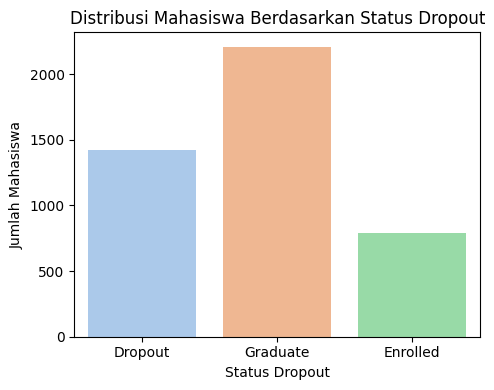


Proporsi Status Dropout (%):
Status
Graduate    49.932188
Dropout     32.120253
Enrolled    17.947559
Name: proportion, dtype: float64


In [17]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Status', palette='pastel')
plt.title("Distribusi Mahasiswa Berdasarkan Status Dropout")
plt.xlabel("Status Dropout")
plt.ylabel("Jumlah Mahasiswa")
plt.tight_layout()
plt.show()

Target_counts = df['Status'].value_counts(normalize=True) * 100
print("\nProporsi Status Dropout (%):")
print(Target_counts)


#### Visualisasi Data
Mengambil semua nama kolom dari dataframe df lalu menghitung berapa banyak baris dan kolom grid yang dibutuhkan agar semua fitur bisa divisualisasikan dalam 3 subplot. Kemudian membuat figure dan axes menggunakan matplotlib, lalu mengubah susunannya agar mudah diakses satu per satu. Dilakukan iterasi untuk setiap kolom dan dibuatkan histogramnya dengan judul masing-masing setiap diagramnya agar mudah untuk dibaca. 

Berikut adalah penjelasan untuk histogram distribusi data dari gambar yang kamu kirim, yang memvisualisasikan distribusi setiap fitur dalam dataset mahasiswa:

1. **Marital_status**
   Mayoritas mahasiswa belum menikah (kategori 1), sedikit yang menikah (kategori 2), sisanya sangat jarang.

2. **Application_mode**
   Beberapa mode aplikasi mendominasi (kode 1, 2, 5), lainnya jauh lebih sedikit.

3. **Application_order**
   Kebanyakan mahasiswa diterima di pilihan pertama (1), makin sedikit untuk pilihan ke-2 dst.

4. **Course**
   Distribusi sangat berat di satu kode kursus tertentu (mungkin kursus populer), sisanya minor.

5. **Daytime_evening_attendance**
   Mayoritas mahasiswa menghadiri kelas siang (0), sedikit kelas malam (1).

6. **Previous_qualification**
   Terbanyak berasal dari jenis kualifikasi sebelumnya tertentu (misal kode 1, 3).

7. **Previous_qualification_grade**
   Sebaran menyerupai distribusi normal, kebanyakan di tengah rentang nilai (sekitar 140).

8. **Nacionality**
   Hampir seluruh mahasiswa berasal dari satu negara dominan (kode 1), lainnya sangat sedikit.

9. **Mothers_qualification & Fathers_qualification**
   Beberapa tingkat pendidikan orang tua mendominasi (kode 1–3), sisanya minoritas.

10. **Mothers_occupation & Fathers_occupation**
    Sebagian besar tidak diisi (0), menunjukkan banyak data kosong atau tidak diketahui.

11. **Admission_grade**
    Sebaran menyerupai normal, nilai masuk banyak berada di tengah (sekitar 130–160).

12. **Displaced**
    Mayoritas tidak mengungsi (0), sedikit yang merupakan pelajar terdampak (1).

13. **Educational_special_needs**
    Hampir semua tidak memiliki kebutuhan khusus, sangat sedikit yang memilikinya.

14. **Debtor**
    Mayoritas mahasiswa tidak memiliki utang (0), sedikit yang memiliki utang (1).

15. **Tuition_fees_up_to_date**
    Mayoritas telah membayar penuh (1), sebagian kecil tertunggak (0).

16. **Gender**
    Distribusi hampir seimbang antara laki-laki (0) dan perempuan (1), sedikit lebih banyak perempuan.

17. **Scholarship_holder**
    Mayoritas tidak menerima beasiswa, hanya sebagian kecil yang menerima.

18. **Age_at_enrollment**
    Mayoritas mahasiswa berusia 17–22 tahun saat mendaftar, distribusi condong ke kiri.

19. **International**
    Hampir seluruh mahasiswa bukan mahasiswa internasional (0).

20. **Curricular_units_1st_sem_* dan 2nd_sem_*_**
    * **Enrolled**: Banyak mahasiswa mengambil 4–8 mata kuliah.
    * **Approved**: Distribusi lebih menyebar, menurun setelah nilai tengah.
    * **Grade**: Menyerupai distribusi normal di sekitar nilai 10–14.
    * **Evaluations**: Beberapa mengikuti banyak evaluasi (5–10+), lainnya sedikit.
    * **Without_evaluations**: Banyak mahasiswa yang tidak menghadiri 0–2 evaluasi.

21. **Unemployment_rate, Inflation_rate, GDP**
    Distribusi terlihat acak atau periodik, mencerminkan fluktuasi ekonomi di tiap periode data dikumpulkan.

22. **Status**
    Tiga kategori utama:
    * **Enrolled** (aktif kuliah)
    * **Graduate** (lulus)
    * **Dropout** (keluar)
    Jumlah mahasiswa aktif dan lulusan cukup tinggi, dropout lebih sedikit.


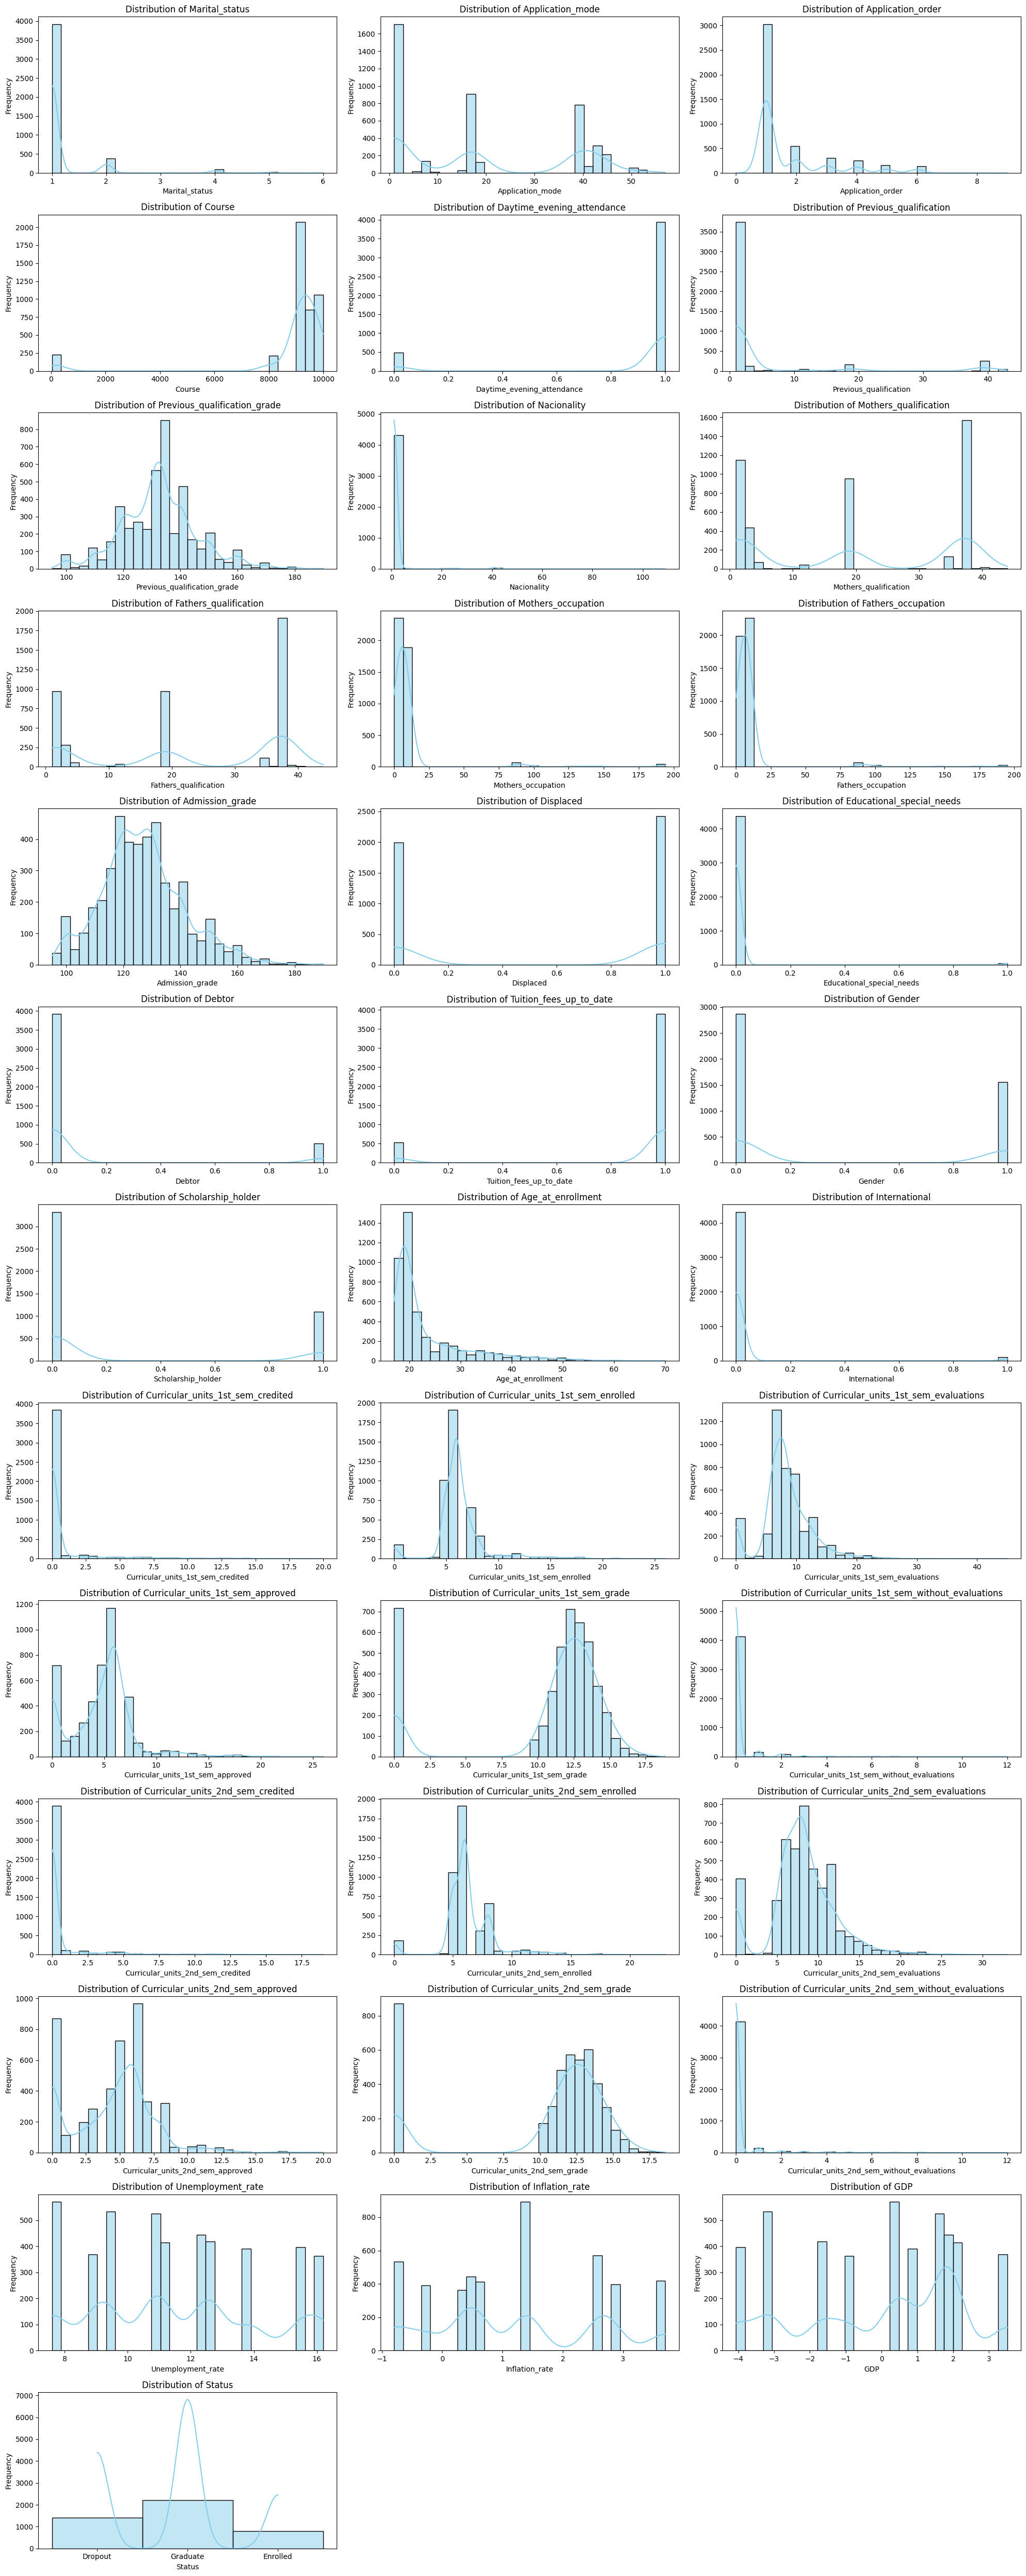

In [18]:
cols = df.columns.to_list()
n_cols = 3
n_rows = -(-len(cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 50))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### Korelasi antar Fitur

Untuk memberikan informasi mengenai korelasi antara setiap fitur yang ada didataset

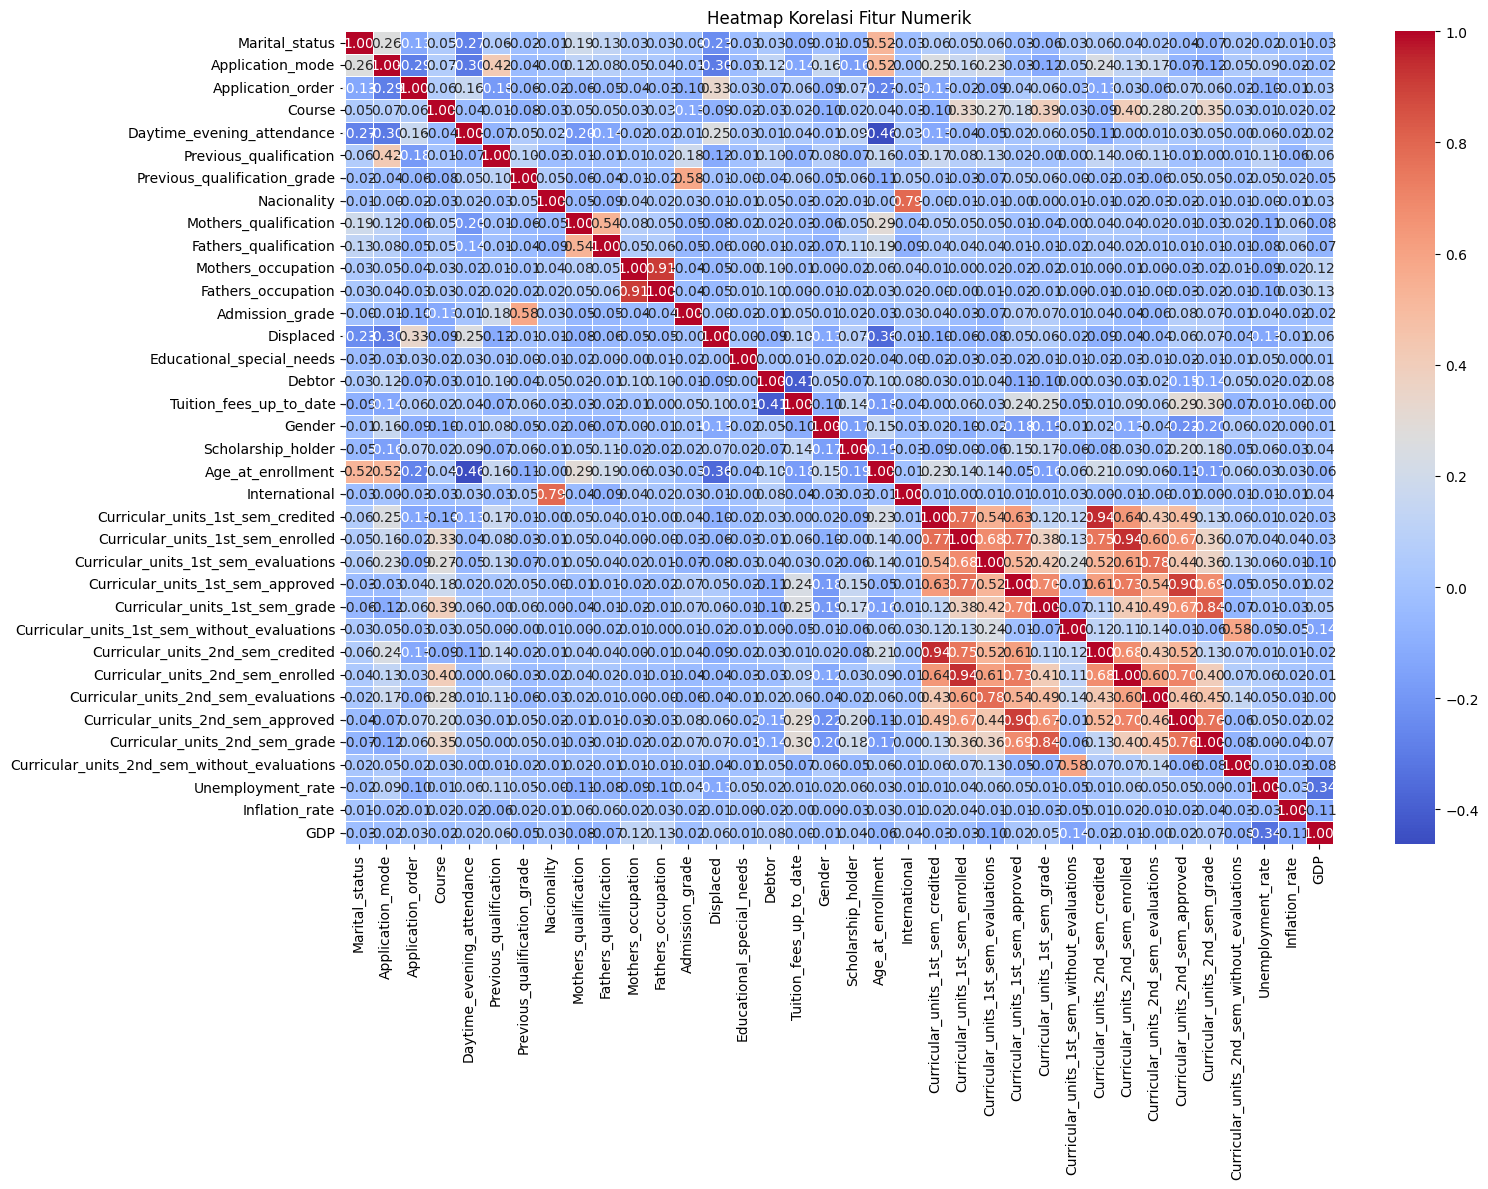

In [9]:
# Korelasi antar fitur numerik
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()


#### Pengecekan Missing Value
- Kode ini digunakan untuk mengecek apakah di dalam kolom yang ada di df terdapat missing value, kemudian di print atau ditampilkan. 
- Hasilnya adalah tidak ada missing value pada semua kolom. sehingga tidak diharuskan untuk adanya handling missing value

In [4]:
missing_values = df.isnull().sum()
missing_values

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


#### Pengecekan Duplikat Value
- Kode ini digunakan untuk mengecek apakah di dalam kolom yang ada di df terdapat duplikat value, kemudian di print atau ditampilkan. 
- Hasilnya adalah tidak ada duplikat value disemua kolom

In [5]:
duplicate_values = df.duplicated().sum()
print("jumlah data duplikat", duplicate_values)

jumlah data duplikat 0


## Data Preparation

### Data Preprocessing

#### Menghapus Missing Value

Kode ini mendefinisikan dan menerapkan fungsi untuk menghapus missing value pada semua kolom. 

In [6]:
df_cleaned = df.dropna()
print("Data setelah menghapus missing value:", df_cleaned.shape)

Data setelah menghapus missing value: (4424, 37)


#### Melihat  korelasi

Beberapa fitur sosial dan administratif juga menunjukkan pengaruh terhadap status dropout:
1. Tuition_fees_up_to_date: Mahasiswa yang tidak membayar biaya kuliah tepat waktu memiliki kemungkinan dropout jauh lebih tinggi. Ini mengindikasikan bahwa faktor ekonomi/keuangan berperan penting.
2. Scholarship_holder: Mahasiswa penerima beasiswa cenderung lebih sedikit yang dropout, yang bisa dikaitkan dengan motivasi atau dukungan finansial yang stabil.
3. Debtor: Mahasiswa yang memiliki utang pendidikan menunjukkan angka dropout lebih tinggi, kembali memperkuat pengaruh tekanan finansial.
4. Displaced dan Educational_special_needs: Kategori ini cenderung memiliki jumlah data kecil, namun mahasiswa yang termasuk dalam kategori ini memiliki dropout yang sedikit lebih tinggi — perlu investigasi lebih lanjut.
5. Daytime_evening_attendance: Mahasiswa kelas malam (evening class) memiliki dropout yang lebih tinggi dibandingkan kelas pagi. Ini bisa dikaitkan dengan beban kerja tambahan (mereka mungkin bekerja di siang hari) atau kelelahan.
6. Gender: Perbedaan gender tidak terlalu signifikan, meskipun pria sedikit lebih banyak yang dropout dibanding wanita.
7. International: Mahasiswa internasional jumlahnya sangat sedikit, namun proporsi dropout mereka tampaknya cukup tinggi — bisa disebabkan oleh masalah adaptasi, biaya, atau kendala visa.

Kesimpulan kategorikal: Mahasiswa dengan keterbatasan finansial (tidak bayar SPP, punya utang), non-reguler (kelas malam), dan bukan penerima beasiswa cenderung lebih rentan mengalami dropout.

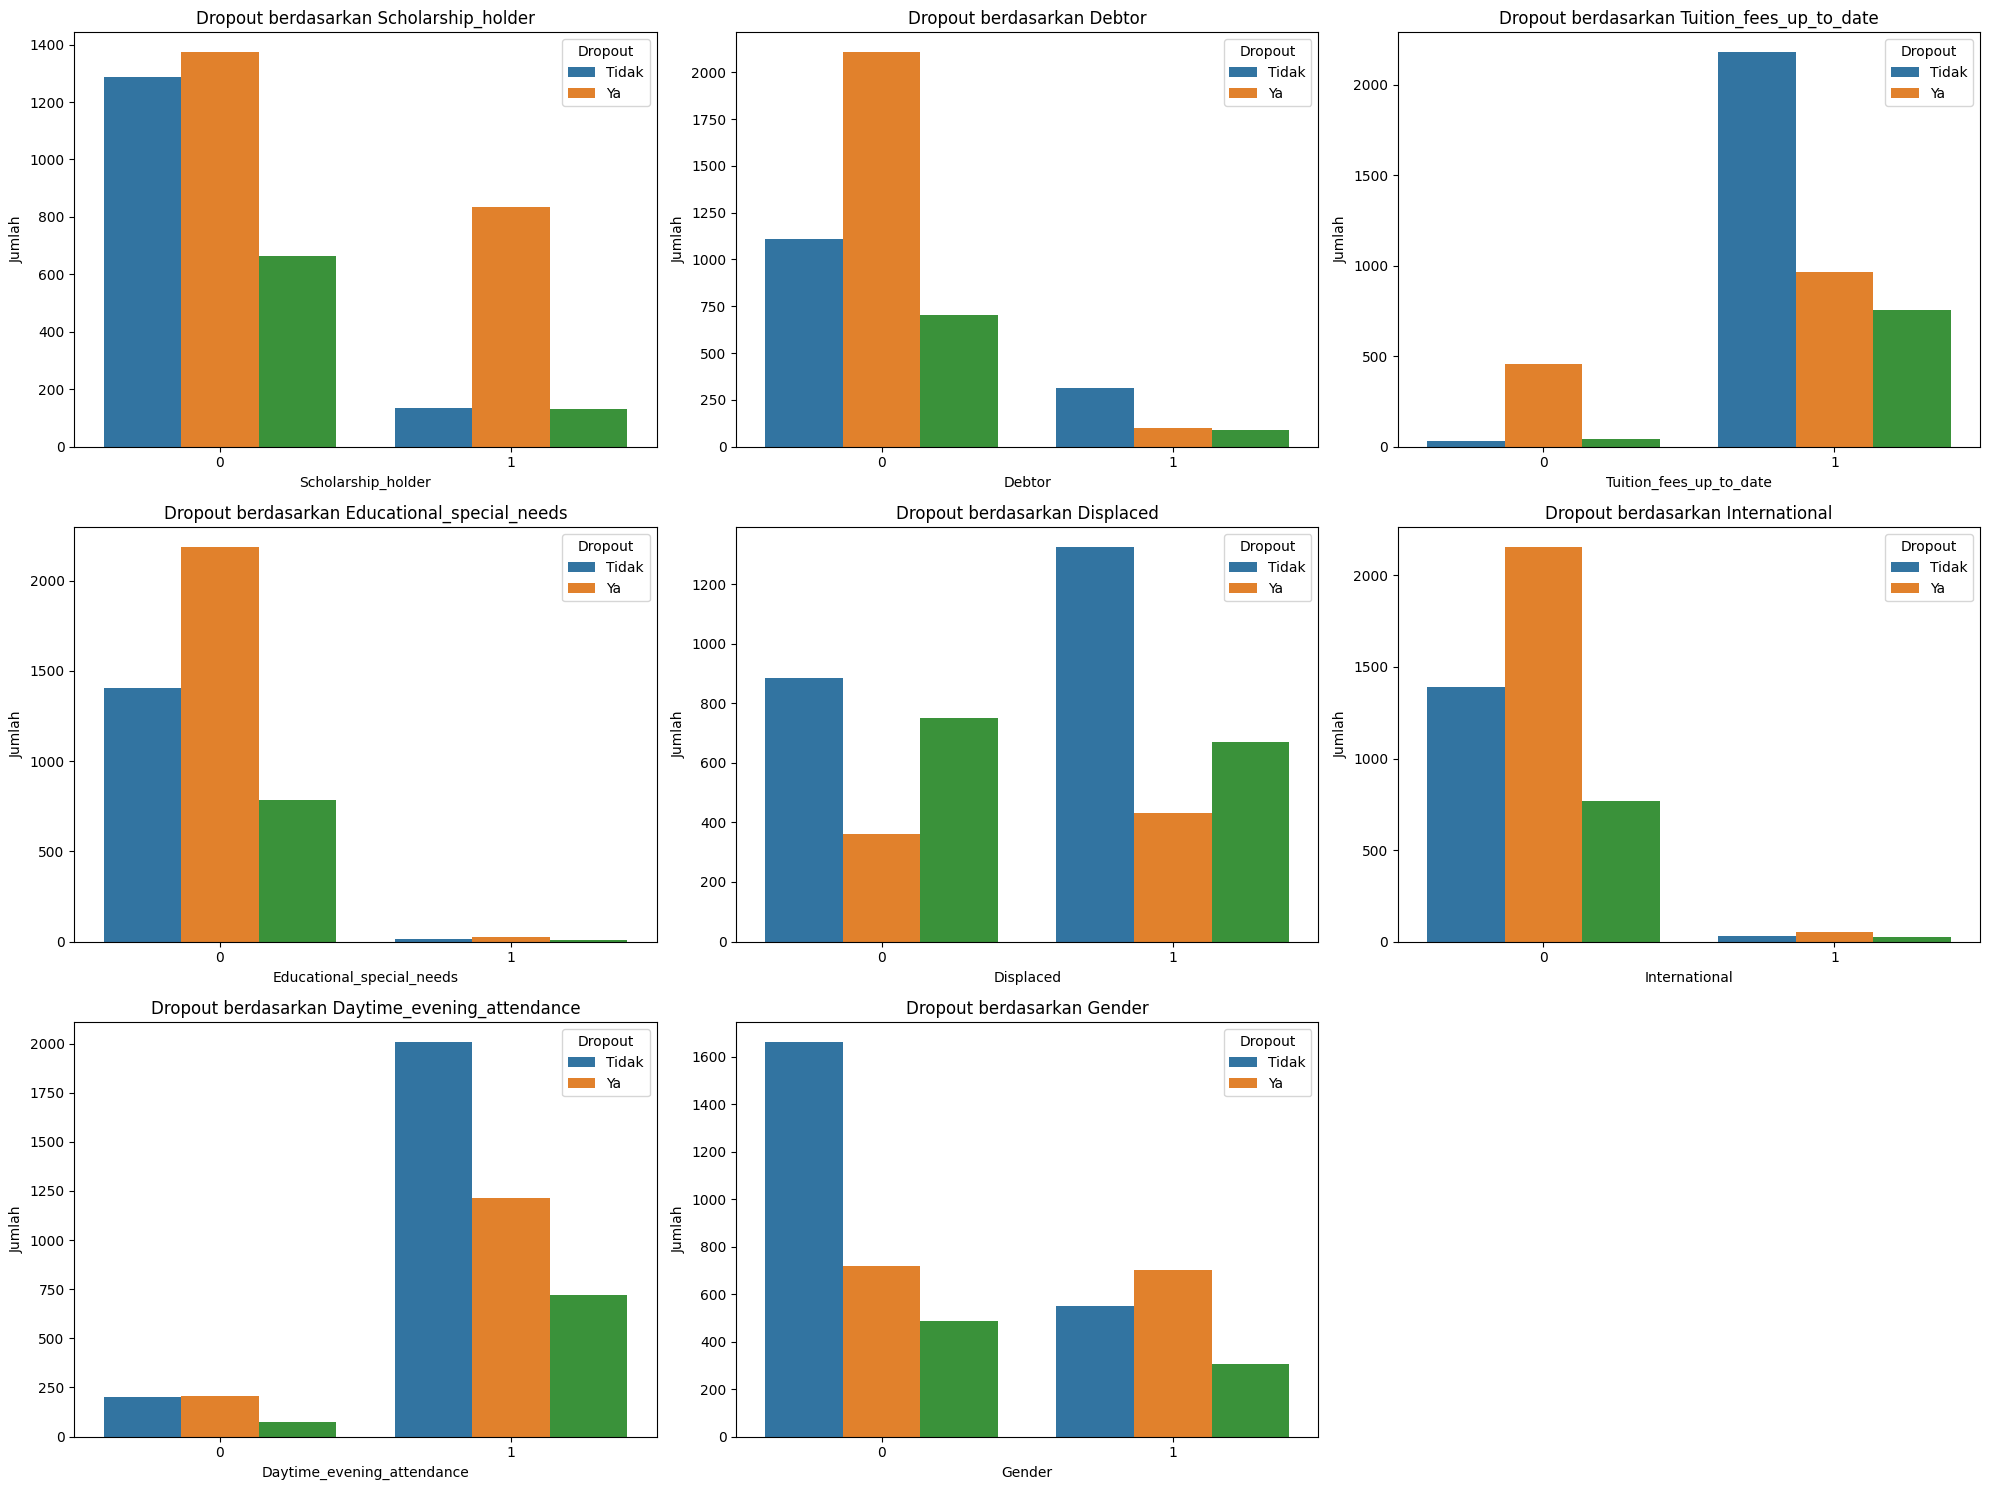

In [23]:
categorical_cols = [
    'Scholarship_holder',
    'Debtor',
    'Tuition_fees_up_to_date',
    'Educational_special_needs',
    'Displaced',
    'International',
    'Daytime_evening_attendance',
    'Gender'
]

# Visualisasi fitur kategorikal
n_cols = 3
n_rows = -(-len(categorical_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_cleaned, x=col, hue='Status', ax=axes[i])
    axes[i].set_title(f'Dropout berdasarkan {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah')
    axes[i].legend(title='Dropout', labels=['Tidak', 'Ya'])

# Hapus axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Tampak beberapa tren menarik yang dapat menjadi indikator dropout:
1. Age at enrollment: Mahasiswa dengan usia masuk yang lebih tua memiliki kecenderungan lebih tinggi untuk dropout, mungkin karena tekanan tanggung jawab lain seperti pekerjaan atau keluarga.
2. Curricular_units_1st_sem_grade dan 2nd_sem_grade: Mahasiswa yang dropout memiliki nilai rata-rata semester 1 dan 2 yang jauh lebih rendah dibandingkan mahasiswa yang lulus atau masih aktif. Ini menandakan bahwa prestasi akademik awal sangat berpengaruh terhadap risiko dropout.
3. Curricular_units_approved (semester 1 dan 2): Jumlah mata kuliah yang disetujui (lulus) juga jauh lebih sedikit pada mahasiswa yang dropout, mengindikasikan kesulitan akademik sebagai faktor utama.
4. Curricular_units_enrolled (semester 1 dan 2): Perbedaan tidak terlalu signifikan, namun terlihat bahwa mahasiswa yang dropout cenderung mendaftar jumlah SKS sedikit lebih rendah, bisa jadi karena kurang motivasi atau pengambilan cuti sebagian.

Kesimpulan numerik: Nilai rendah dan sedikitnya mata kuliah yang lulus dalam dua semester pertama menjadi sinyal kuat mahasiswa berpotensi dropout.

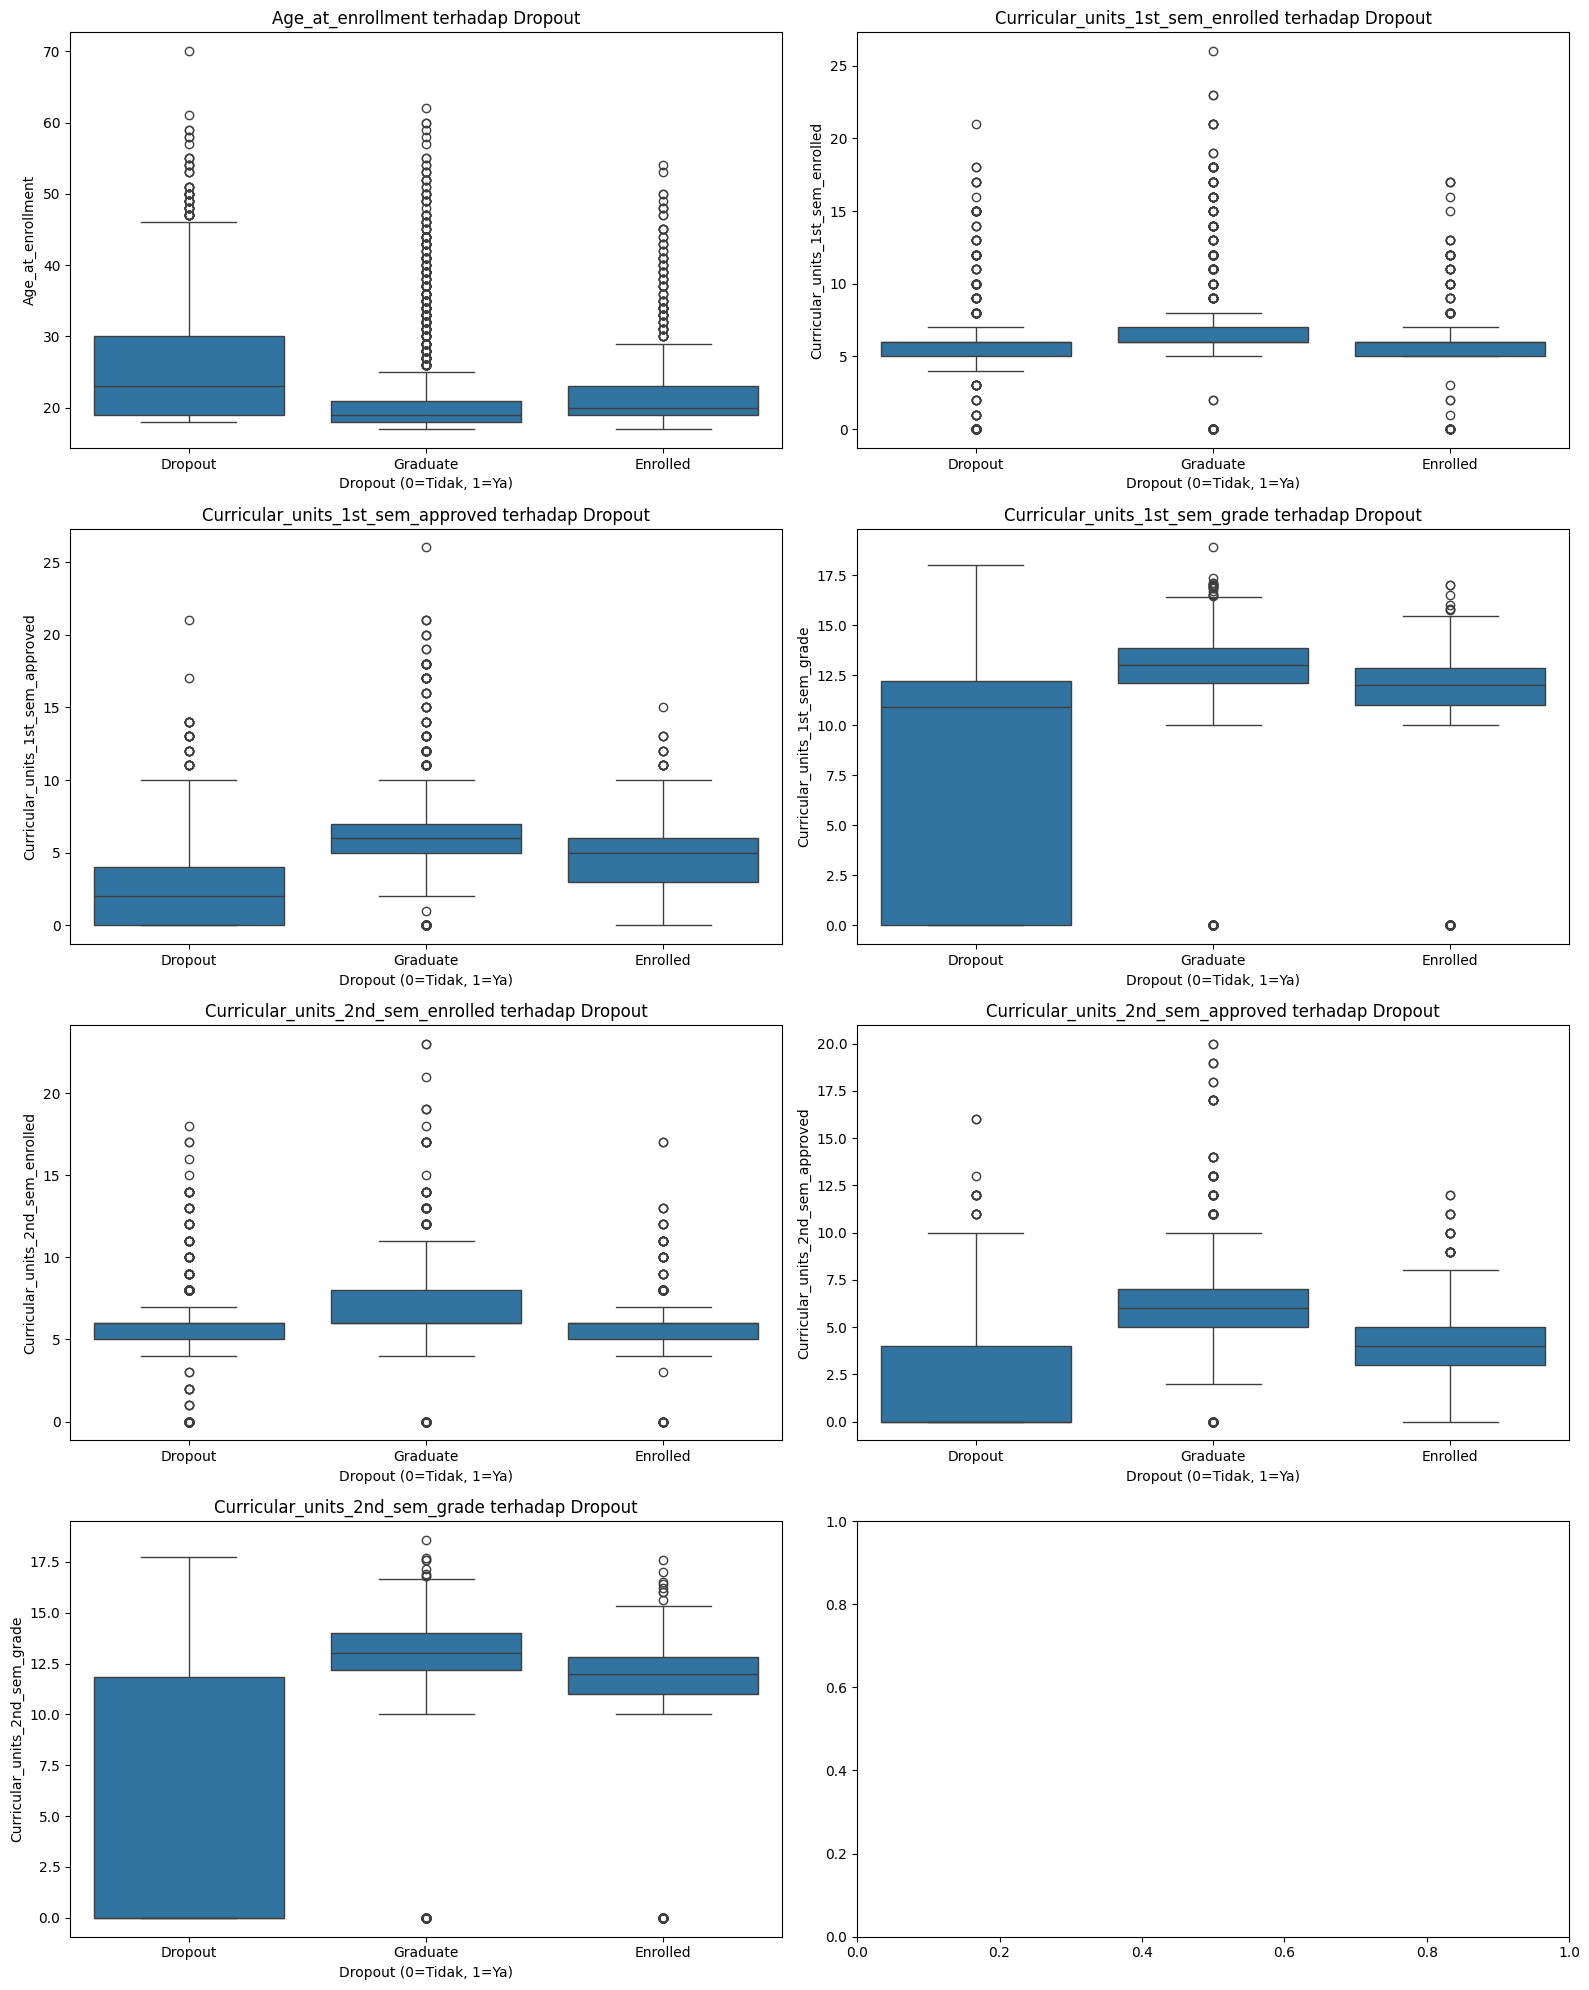

In [24]:
# Visualisasi fitur numerik terhadap dropout (menggunakan boxplot)
numerical_cols = [
    'Age_at_enrollment',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_2nd_sem_approved',
    'Curricular_units_2nd_sem_grade'
]

n_cols = 2
n_rows = -(-len(numerical_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df_cleaned, x='Status', y=col, ax=axes[i])
    axes[i].set_title(f'{col} terhadap Dropout')
    axes[i].set_xlabel('Dropout (0=Tidak, 1=Ya)')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


digunakan untuk ngecopy data pada df_cleaned ke df_model

In [8]:
df_model = df_cleaned.copy()

#### Melakukan filter label ke biner: Dropout (1) vs Graduate (0)

Hal ini dikarenakan banyaknya mahasiswa yang dropout, sehingga saya membuat prediksi kemungkinan mahasiswa akan dropout (1) atau tidak (0). untuk status enrolled belum final maka dari itu tidak digunakan

In [9]:
df_model = df_model[df_model['Status'].isin(['Dropout', 'Graduate'])].copy()
df_model['Status'] = df_model['Status'].map({'Graduate': 0, 'Dropout': 1})

In [11]:
df_model.to_csv('data_cleaned.csv', index=False)

#### Memilah fitur yang relevan

Kode ini digunakan untuk memilah fitur yang relevan terhadap prediksi kemungkinan mahasiswa akan dropout

In [35]:
features = [
    "Age_at_enrollment",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_2nd_sem_grade",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_2nd_sem_approved",
    "Tuition_fees_up_to_date",
    "Scholarship_holder",
    "Debtor",
    "Daytime_evening_attendance"
]

#### Memisahkan fitur dan target

Kode tersebut digunakan untuk memisahkan data fitur dan target (Attrition). Variabel X berisi seluruh kolom kecuali Attrition dan EmployeeId\, sedangkan y hanya berisi kolom Attrition yang menunjukkan apakah seorang karyawan keluar dari perusahaan atau tidak.

In [36]:
X = df_model[features].astype(float)
y = df_model['Status']

#### Split data latih dan testing

Digunakan untuk memisahkan data latih dan testing dengan proporsi 80:20

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Modelling


#### Random Forest Classifier
Kode tersebut membangun model klasifikasi menggunakan algoritma Random Forest. Model dilatih dengan data latih (X_train, y_train) menggunakan .fit(), dan setelah model terlatih, digunakan untuk memprediksi data uji (X_test) melalui .predict(). Hasil prediksi disimpan dalam variabel y_pred, yang berisi prediksi apakah mahasiswa akan dropout atau tidak.

In [45]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Evaluasi

#### Hasil Evaluasi Random Forest
Digunakan untuk memberikan classification report untuk Model Random Forest dan menunjukkan performa yang cukup baik dengan akurasi sebesar 90%. 

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       442
           1       0.89      0.86      0.87       284

    accuracy                           0.90       726
   macro avg       0.90      0.90      0.90       726
weighted avg       0.90      0.90      0.90       726



In [43]:
joblib.dump(model, 'dropout_model.pkl')

['dropout_model.pkl']

#### Evaluasi Model

Berdasarkan hasil evaluasi, model Random Forest unggul dalam metrik evaluasi: akurasi, presisi, recall, dan F1-score.  Random Forest mencatat akurasi tinggi sebesar 90,36% dan F1-score sebesar 87.41%, yang menunjukkan kemampuan yang baik dalam mengklasifikasikan kedua kelas Status Dropout dan Graduate secara seimbang.

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"\n=== {model_name} Evaluation ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")

evaluate_model(y_test, y_pred, "Random Forest")



=== Random Forest Evaluation ===
Accuracy:  0.9036
Precision: 0.8934
Recall:    0.8556
F1 Score:  0.8741
